# 400_Analysis_Q2A

# _Question Two: What Vehicles are involved in the most road accidents?_

## _(A): Are newer vehicles safer than older vehicles?_


## Purpose
In this notebook we will explore what types of vehicles are involved in the most road accidents. In particular, we will analyse the age of vehicles and determine whether or not newer vehicles are safer than older vehicles. To do this, we will use our 'Age_of_Vehicle' and 'Year' columns to see whether more accidents occur in older vehicles. We will also look at the number of casualties, the severity of each accident for old vs new vehicles and if newer vehicles are better in wet weather conditions. Additionally, we will analyse the data to see how the introduction of modern technologies impacted the number of road accidents.

## Notebook Contents:
* __1:__ Loading our Datasets
   
* __2:__ The range of years that we will be using for this research question.

* __3:__ Are older vehicles  in more accidents?

* __4:__ Are there more casualties in older vehicles?
     
* __5:__ Are accidents more severe in older vehicles?

* __6:__ Are newer vehicles safer in rainy weather conditions?

* __7:__ How did the introduction of modern technologies influence road safety?
    * __7.1:__ Airbags
    * __7.2:__ AEB Brakes
    
* __8:__ Saving Data to a Pickle File

* __9:__ Creating Data Dictionaries

## Datasets

__Input:__

* 800_Q2A_final_prep_1.pkl  (Data needed for Q2A for years 1979-2004)
* 800_Q2A_final_prep_2.pkl  (Continuation of data needed for Q2A for years 1979-2004)
* 800_Q2A_final_prep_3.pkl  (Data needed for Q2A for years 2005-2016)


__Output:__ 
* 400_Analysis_Q2A_All_Num_Accidents.pkl   (Number of accidents for ages of vehicles)
* 400_Analysis_Q2A_All_less_than_or_equal_2004.pkl   (Number of accidents for ages of vehicles 1993-2004)
* 400_Analysis_Q2A_All_greater_than_or_equal_2005.pkl   (Number of accidents for ages of vehicles 2005-2016) 
* 400_Analysis_Q2A_All_number_of_Casualties.pkl   (Average number of casualties for all vehicle ages)
* 400_Analysis_Q2A_norm_All_Accident_Severity_groups.pkl   (Number of fatal, serious and slight accidents for all vehicle ages)
* 400_Analysis_Q2A_norm_All_weather_conditions_groups.pkl   (Normalised number of accidents in the different recorded weather conditions for all vehicle ages)
* 400_Analysis_Q2A_max_fatal.pkl   (Age of vehicle in the weather condition with the most fatal accidents)
* 400_Analysis_Q2A_max_serious.pkl   (Age of the vehicle in the weather condition with the most serious accidents)
* 400_Analysis_Q2A_max_slight.pkl   (Age of the vehicle in the weather condition with the most slight accidents)
* 400_Analysis_Q2A_rain_analysis_all.pkl   (All the data related to rainy weather conditions)
* 400_Analysis_Q2A_all_num_accidents_groups.pkl   (Number of accidents in each year)
* 400_Analysis_Q2A_All_Accident_Severity_airbags.pkl   (Airbags severity analysis)
* 400_Analysis_Q2A_sub_All_Accident_Severity_airbags.pkl   (Airbags severity analysis – years surrounding when airbags became compulsory)
* 400_Analysis_Q2A_All_Accident_Severity_AEB.pkl   (AEB brakes analysis)
* 400_Analysis_Q2A_sub_All_Accident_Severity_AEB.pkl   (AEB brakes severity analysis – years around when they were introduced)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

# 1. Loading the Datasets

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets for the purpose of answering this research question.

In [2]:
Q2A_1 = pd.read_pickle('../../data/processed/800_Q2A_final_prep_1.pkl')
Q2A_1.shape

(2033305, 19)

In [3]:
Q2A_2 = pd.read_pickle('../../data/processed/800_Q2A_final_prep_2.pkl')
Q2A_2.shape

(1242776, 19)

In [4]:
Q2A_3 = pd.read_pickle('../../data/processed/800_Q2A_final_prep_3.pkl')
Q2A_3.shape

(2355070, 19)

# 2. The range of years that we will be using for this research question
Below you can see the first two rows of the first dataset and the last two rows of the third and final dataset. By looking at the 'Date' column you can see that the data ranges from 1993 - 2016.

In [5]:
Q2A_1.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Vehicle_Type,Vehicle_Manoeuvre,Sex_of_Driver,Age_of_Vehicle,Date_day,Month,Year
6000001,199301NI00616,slight,2,1,20/10/1993,thursday,11:25,3,daylight,fine no high winds,dry,none,car,turning left,male,6.0,20,10,1993
6000002,199301NI00617,slight,2,1,15/11/1993,tuesday,15:43,3,daylight,fine no high winds,dry,none,van / goods 3.5 tonnes mgw or under,turning right,male,4.0,15,11,1993


In [6]:
Q2A_3.tail(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Vehicle_Type,Vehicle_Manoeuvre,Sex_of_Driver,Age_of_Vehicle,Date_day,Month,Year
479546,2016984131316,slight,1,3,29/10/2016,sunday,20:00,917,darkness - lights lit,fine no high winds,dry,none,car,going ahead other,male,13.0,29,10,2016
479547,2016984133416,slight,1,2,25/12/2016,monday,12:30,917,daylight,raining + high winds,wet or damp,none,car,going ahead other,male,5.0,25,12,2016


# 3. Are older vehicles  in more accidents?
Here we will specifically look at which age of vehicle has the greatest number of road accidents. This will then allow us to evaluate whether or not older vehicles are involved in more road accidents. 

For this question we are considering an old vehicle to be a vehicle which is 10 years and older.

## Groupby

* Since we are focusing on the age of the vehicles involved in accidents, we will group accidents based on the age of the vehicle at the time of the accident. For this we will use the 'Age_of_Vehicle' column.
* We will then count the number of accidents for each age of vehicle by using the 'Accident_Index' column. 
  Each row in the 'Accident_Index' column represents an accident. Therefore, by counting the number of rows in the 'Accident_Index' column for each age of vehicle we will get the number of accidents for each age.

#### Q2A_1

In [7]:
Num_Accidents_groups_1 = Q2A_1.groupby('Age_of_Vehicle')[['Accident_Index']].count()
Num_Accidents_groups_1.head()

,Accident_Index
Age_of_Vehicle,
1.0,179016
2.0,161192
3.0,152775
4.0,156116
5.0,158951


#### Q2A_2

In [8]:
Num_Accidents_groups_2 = Q2A_2.groupby('Age_of_Vehicle')[['Accident_Index']].count()
Num_Accidents_groups_2.head()

,Accident_Index
Age_of_Vehicle,
1.0,125726
2.0,116719
3.0,107388
4.0,103720
5.0,97302


#### Q2A_3

In [9]:
Num_Accidents_groups_3 = Q2A_3.groupby('Age_of_Vehicle')[['Accident_Index']].count()
Num_Accidents_groups_3.head()

,Accident_Index
Age_of_Vehicle,
1.0,195664
2.0,183342
3.0,178770
4.0,181557
5.0,181284


### Aggregate Results

Below we will create a new dataframe containing the number of accidents which have occurred for each vehicle age for all of our 3 dataframes created above.

We will also rename the 'Accident_Index' column to 'Accident_Count' as the column contains the number of accidents for each vehicle age (calculated in above cells).

Finally, we will group the data by the 'Age_of_vehicle' column which is the age of the vehicle at the time of the accident. We will then sum the 'Accident_Count' for each group to give the total number of accidents for each vehicle age.

In [10]:
All_Num_Accidents = pd.concat([Num_Accidents_groups_1, Num_Accidents_groups_2, Num_Accidents_groups_3])
All_Num_Accidents = All_Num_Accidents.rename(columns={'Accident_Index': 'Accident_Count'})
All_Num_Accidents.head()

,Accident_Count
Age_of_Vehicle,
1.0,179016
2.0,161192
3.0,152775
4.0,156116
5.0,158951


In [11]:
All_Num_Accidents = All_Num_Accidents.groupby(level=0).sum()
All_Num_Accidents.head()

,Accident_Count
Age_of_Vehicle,
1.0,500406
2.0,461253
3.0,438933
4.0,441393
5.0,437537


From the graph below you can see that newer vehicles are involved in more accidents with vehicles between 1 and 10 having the highest count. This is a result which we really didn't expect. We had originally anticipated that older vehicles would be involved in more accidents. 

In order to explore this further we will split the data into two dataframes. The first dataframe will contain data between the years 1993-2004 and the second will contain data between 2005-2016. 

This will allow us to see whether older vehicles in the older time period (1993-2004) has more accidents than in more recent years (2005-2016).

Text(0.5,0,'Age of Vehicle')

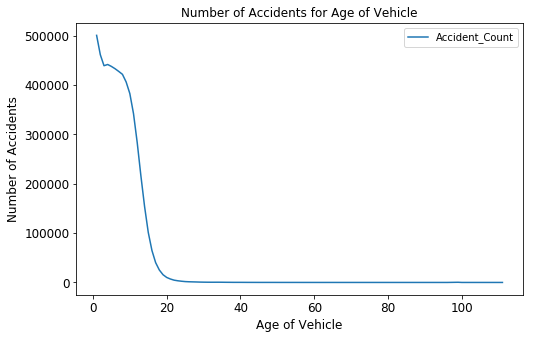

In [12]:
All_Num_Accidents.plot(title='Number of Accidents for Age of Vehicle', figsize=(8,5), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

#### Q2A_1

In [13]:
lessThan_orEqual_2004_1 = Q2A_1[Q2A_1['Year'] <= 2004]
greaterThan_orEqual_2005_1 = Q2A_1[Q2A_1['Year'] >= 2005]

In [14]:
lessThan_orEqual_2004_Num_Accidents_1 = lessThan_orEqual_2004_1.groupby('Age_of_Vehicle')[['Accident_Index']].count()
greaterThan_orEqual_2005_Num_Accidents_1 = greaterThan_orEqual_2005_1.groupby('Age_of_Vehicle')[['Accident_Index']].count()

#### Q2A_2

In [15]:
lessThan_orEqual_2004_2 = Q2A_2[Q2A_2['Year'] <= 2004]
greaterThan_orEqual_2005_2= Q2A_2[Q2A_2['Year'] >= 2005]

In [16]:
lessThan_orEqual_2004_Num_Accidents_2 = lessThan_orEqual_2004_2.groupby('Age_of_Vehicle')[['Accident_Index']].count()
greaterThan_orEqual_2005_Num_Accidents_2 = greaterThan_orEqual_2005_2.groupby('Age_of_Vehicle')[['Accident_Index']].count()

#### Q2A_3

In [17]:
lessThan_orEqual_2004_3 = Q2A_3[Q2A_3['Year'] <= 2004]
greaterThan_orEqual_2005_3 = Q2A_3[Q2A_3['Year'] >= 2005]

In [18]:
lessThan_orEqual_2004_Num_Accidents_3 = lessThan_orEqual_2004_3.groupby('Age_of_Vehicle')[['Accident_Index']].count()
greaterThan_orEqual_2005_Num_Accidents_3 = greaterThan_orEqual_2005_3.groupby('Age_of_Vehicle')[['Accident_Index']].count()

### Aggregate Results

Below we will create two new dataframes containing the number of accidents which have occurred for each vehicle age between the years 1993-2004 and 2005-2016. 

We will do this by concatenating the 3 dataframes created above for the years 1993-2004 and the 3 dataframes created above for the years 2005-2016.

For each dataframe we will also group by the data by the 'Age_of_Vehicle' column which is the age of the vehicle at the time of the accident. We will then sum the 'Accident_Count' for each of these groups which is the number of accidents. This will give us total number of accidents for each age of vehicle.

Again we will rename the 'Accident_Index' column to 'Accident_Count' as the column contains the number of accidents for each vehicle age (calculated in above cells).

Finally, we will group the data by the 'Age_of_Vehicle' column which is the age of the vehicle at the time of the accident. We will then sum the 'Accident_Count' for each group to give the total number of accidents for each vehicle age.

#### 1993-2004

In [19]:
All_less_than_or_equal_2004 = pd.concat([lessThan_orEqual_2004_Num_Accidents_1, lessThan_orEqual_2004_Num_Accidents_2, lessThan_orEqual_2004_Num_Accidents_3], axis=0).groupby(level=0).sum()
All_less_than_or_equal_2004 = All_less_than_or_equal_2004.rename(columns={'Accident_Index': 'Accident_Count'})
All_less_than_or_equal_2004.head()

,Accident_Count
Age_of_Vehicle,
1.0,304742
2.0,277911
3.0,260163
4.0,259836
5.0,256253


#### 2005-2016

In [20]:
All_greater_than_or_equal_2005 = pd.concat([greaterThan_orEqual_2005_Num_Accidents_1, greaterThan_orEqual_2005_Num_Accidents_2, greaterThan_orEqual_2005_Num_Accidents_3], axis=0).groupby(level=0).sum()
All_greater_than_or_equal_2005 = All_greater_than_or_equal_2005.rename(columns={'Accident_Index': 'Accident_Count'})
All_greater_than_or_equal_2005.head()

,Accident_Count
Age_of_Vehicle,
1.0,195664
2.0,183342
3.0,178770
4.0,181557
5.0,181284


### Comparing the two time periods (1993-2004 and 2005-2016)
In the following two graphs you can see that in both time periods newer vehicles have more accidents than older vehicles. 

This is still not a result which we had expected and therefore is a topic for future analysis.

Text(0.5,0,'Age of Vehicle')

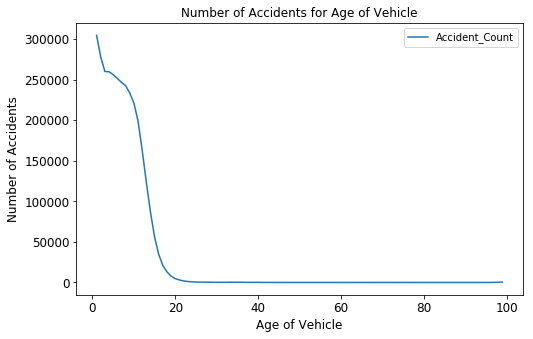

In [21]:
All_less_than_or_equal_2004.plot(title='Number of Accidents for Age of Vehicle', figsize=(8,5), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

Text(0.5,0,'Age of Vehicle')

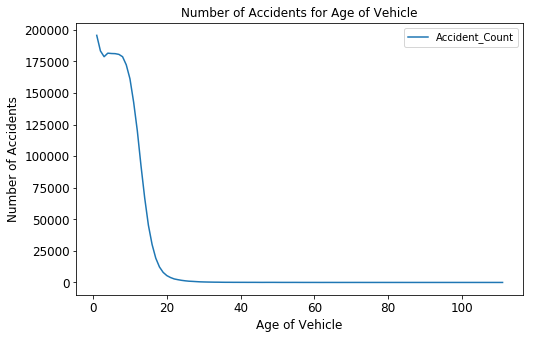

In [22]:
All_greater_than_or_equal_2005.plot(title='Number of Accidents for Age of Vehicle', figsize=(8,5), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

# 4. Are there more casualties in older vehicles?

Next, we will look at the number of casualties for each age of vehicle. From this we will be able to see whether or not accidents in older vehicles results in more casualties.

For this question we are considering an old vehicle to be a vehicle which is 10 years and older.


### Groupby
* Since we are focusing on the age of the vehicles involved in accidents, we will group accidents based on the age of the vehicle at the time of the accident. For this we will use the 'Age_of_Vehicle' column which gives the age of the vehicle at the time of the accident.
* We will then get the average number of casualties in an accident for each age of vehicle by using the 'Number_of_Casualties' column which gives the data on the number of casualties in each accident.

#### Q2A_1

In [23]:
Number_of_Casualties_groups_1 = Q2A_1.groupby('Age_of_Vehicle')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_1.head()

,Number_of_Casualties
Age_of_Vehicle,
1.0,1.491906
2.0,1.494243
3.0,1.489674
4.0,1.487119
5.0,1.489786


#### Q2A_2

In [24]:
Number_of_Casualties_groups_2 = Q2A_2.groupby('Age_of_Vehicle')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_2.head()

,Number_of_Casualties
Age_of_Vehicle,
1.0,1.487306
2.0,1.489955
3.0,1.496424
4.0,1.499470
5.0,1.495262


#### Q2A_3

In [25]:
Number_of_Casualties_groups_3 = Q2A_3.groupby('Age_of_Vehicle')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_3.head()

,Number_of_Casualties
Age_of_Vehicle,
1.0,1.465998
2.0,1.469571
3.0,1.471791
4.0,1.470750
5.0,1.469948


### Aggregate Results

* Below we will create a new dataframe containing the average number of casualties for each vehicle age for all of our 3 dataframes created above.

* Each of these three dataframes contains the average number of casualties for each age of vehicle.

* After this we will group this new dataframe by the 'Age_of_Vehicle' which is the age of the vehicle at the time of the accident and sum the values in each group to give us the total 'Number_of_Casualties' for each vehicle age.

* Finally, we will divde each group by 3 as there are three dataframes being contatenated. This will give us the "mean of means" to get the overall mean for each vehicle age.

In [26]:
All_Number_of_Casualties = pd.concat([Number_of_Casualties_groups_1, Number_of_Casualties_groups_2, Number_of_Casualties_groups_3])
All_Number_of_Casualties.head()

,Number_of_Casualties
Age_of_Vehicle,
1.0,1.491906
2.0,1.494243
3.0,1.489674
4.0,1.487119
5.0,1.489786


In [27]:
All_Number_of_Casualties = All_Number_of_Casualties.groupby(level=0).sum()/3
All_Number_of_Casualties.head()

,Number_of_Casualties
Age_of_Vehicle,
1.0,1.481736
2.0,1.484589
3.0,1.485963
4.0,1.485780
5.0,1.484999


In the following plot you can see that vehicles ranging between ~50-75 years old  and ~100 years old have the highest average number of casualties in a road accident. However, "new" vehicles (1-9 years) still have a much higher average than we had anticipated. This is a topic which could be looked into in future research.

Text(0.5,0,'Age of Vehicle')

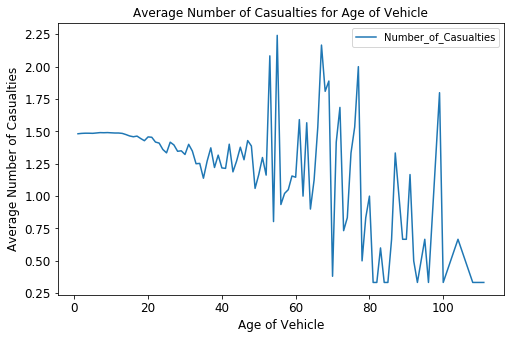

In [28]:
All_Number_of_Casualties.plot(title='Average Number of Casualties for Age of Vehicle', figsize=(8,5), fontsize=12)
plt.ylabel('Average Number of Casualties', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

# 5. Are accidents more severe in older vehicles?

Next, we thought that it would be interesting to look at whether or not the age of the vehicle affects the severity of an accident. From this we will be able to determine if accidents are more severe or not in older vehicles.

Again, for this question we are considering an old vehicle to be a vehicle which is 10 years and older.

### Groupby
Here, we will group the accidents by the 'Age_of_Vehicle' and 'Accident_Severity' columns. We will then count the total number of accidents for each group. 

_Note:_ The 'Age_of_Vehicle' is the age of the vehicle at the time of the accident and the 'Accident_Severity' tells us whether the severity of the accident is slight, serious or fatal.

#### Q2A_1

In [29]:
Accident_Severity_groups_1 = Q2A_1.groupby(['Age_of_Vehicle','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_1.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,2672.0,25858.0,150486.0
2.0,2316.0,22968.0,135908.0
3.0,2148.0,21873.0,128754.0
4.0,2345.0,22569.0,131202.0
5.0,2351.0,22959.0,133641.0


#### Q2A_2

In [30]:
Accident_Severity_groups_2 = Q2A_2.groupby(['Age_of_Vehicle','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_2.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,2092.0,16580.0,107054.0
2.0,1909.0,15021.0,99789.0
3.0,1635.0,13738.0,92015.0
4.0,1543.0,13026.0,89151.0
5.0,1415.0,12026.0,83861.0


#### Q2A_3

In [31]:
Accident_Severity_groups_3 = Q2A_3.groupby(['Age_of_Vehicle','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_3.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,2736.0,25243.0,167685.0
2.0,2666.0,23010.0,157666.0
3.0,2544.0,22481.0,153745.0
4.0,2516.0,22558.0,156483.0
5.0,2458.0,22095.0,156731.0


### Aggregate Results

* Below we will create a new dataframe containing the number of fatal/serious/slight accidents which have occurred for each vehicle age for all of our 3 dataframes created above.
* Each of these three dataframes contains the number of fatal, serious and slight accidents for each vehicle age.
* After concatenating these dataframes we will group the new dataframe by the 'Age_of_Vehicle' which is the age of the vehicle at the time of the accident and sum the values in each of the three columns for each vehicle age. This will give us the total number of fatal, serious and slight accidents for vehicle age.

In [32]:
All_Accident_Severity_groups = pd.concat([Accident_Severity_groups_1, Accident_Severity_groups_2, Accident_Severity_groups_3])
All_Accident_Severity_groups.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,2672.0,25858.0,150486.0
2.0,2316.0,22968.0,135908.0
3.0,2148.0,21873.0,128754.0
4.0,2345.0,22569.0,131202.0
5.0,2351.0,22959.0,133641.0


In [33]:
All_Accident_Severity_groups = All_Accident_Severity_groups.groupby(level=0).sum()
All_Accident_Severity_groups.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,7500.0,67681.0,425225.0
2.0,6891.0,60999.0,393363.0
3.0,6327.0,58092.0,374514.0
4.0,6404.0,58153.0,376836.0
5.0,6224.0,57080.0,374233.0


In the plot below you can see that all of fatal/serious/slight accidents follow the same trend. However, you can see from the y=axis that the number of accidents for each of 'fatal', 'serious' and 'slight' differs greatly.

The most accidents for each severity occurs between the ages of ~1-10 years old.

We thought that this was a very surprising result as we expected older vehicles to hve a higher number of fatal and serious accidents than newer vehicles.

Text(0.5,0,'Age of Vehicle')

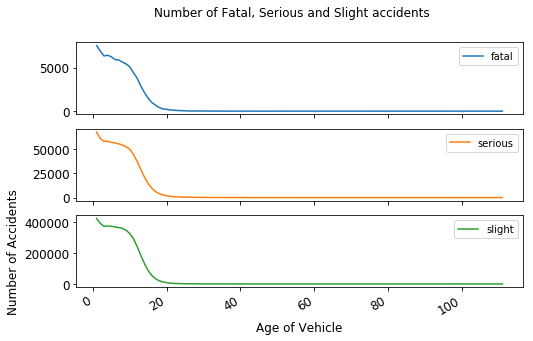

In [34]:
All_Accident_Severity_groups.plot(subplots=True, title='Number of Fatal, Serious and Slight accidents', figsize=(8,5), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

### Normalise
Next, we will normalise the data by the accident severity. We will do this by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 give a % of fatal, serious and slight accidents for each vehicle age.

In [35]:
norm_All_Accident_Severity_groups = All_Accident_Severity_groups.copy() # create a dataframe as copy of original

In [36]:
cols = norm_All_Accident_Severity_groups.columns # define columns to normalise

In [37]:
sum_rows = norm_All_Accident_Severity_groups[cols].sum(axis=1)  # calculate the sum of each row

In [38]:
# divide each column in each row by the total sum of the row
norm_All_Accident_Severity_groups[cols] = norm_All_Accident_Severity_groups[cols].div(sum_rows, axis=0)

In [39]:
# Multiply normalised data by 100 to get a %
percentage_norm_All_Accident_Severity_groups = 100*norm_All_Accident_Severity_groups[cols]
percentage_norm_All_Accident_Severity_groups.head()

Accident_Severity,fatal,serious,slight
Age_of_Vehicle,,,
1.0,1.498783,13.525218,84.975999
2.0,1.493974,13.224629,85.281397
3.0,1.441450,13.234822,85.323728
4.0,1.450861,13.174880,85.374258
5.0,1.422508,13.045754,85.531738


In the plot below you can see that after normalising the data new vehicles have a much lower number of fatal accidents with vehicles between ~60-80 years old having the most.

Older vehicles also have much more serious accidents than new vehicles however both old and new have a high number of slight accidents.

Text(0.5,0,'Age of Vehicle')

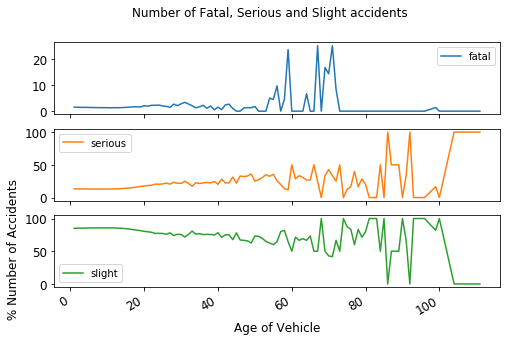

In [40]:
percentage_norm_All_Accident_Severity_groups.plot(subplots=True, title='Number of Fatal, Serious and Slight accidents', figsize=(8,5), fontsize=12)
plt.ylabel(' % Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

# 6. Are newer vehicles safer in rainy weather conditions?
After looking at the accident severity we were interested to see how rainy weather affects the severity of accidents in old and new vehicles. In order to anlayse this we will look at whether or not accidents in rainy weather conditions are less severe than in older vehicles.

Again, for this question we are considering an old vehicle to be a vehicle which is 10 years and older.

### Groupby
Here, we will group the accidents by the 'Age_of_Vehicle' and 'Weather_Conditions' columns. We will then get the value_counts for the 'Accident_Severity' in each of the groups to get the number of slight, serious and fatal accidents for each. 

After grouping the data we will unstack each resulting series to get the data in the format that we want it to be in.

_Note:_ The 'Age_of_Vehicle' column is the age of the vehicle at the time of the accident and the 'Weather_Conditions' tells us what the weather was like at the time of the accident. The 'Accident_Severity' tells us whether the severity of the accident is slight, serious or fatal.

In [41]:
Q2A_1.columns

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Sex_of_Driver', 'Age_of_Vehicle', 'Date_day',
       'Month', 'Year'],
      dtype='object')

#### Q2A_1

In [42]:
weather_conditions_groups_1 = Q2A_1.groupby(['Age_of_Vehicle','Weather_Conditions'])['Accident_Severity'].value_counts()
weather_conditions_groups_1.head(20)

Age_of_Vehicle  Weather_Conditions     Accident_Severity
1.0             fine + high winds      slight                 2180
                                       serious                 424
                                       fatal                    60
                fine no high winds     slight               117422
                                       serious               20596
                                       fatal                  2169
                fog or mist            slight                 1459
                                       serious                 362
                                       fatal                    68
                other                  slight                 2757
                                       serious                 410
                                       fatal                    43
                raining + high winds   slight                 2199
                                       serious                 388
     

In [43]:
new_weather_conditions_groups_1=weather_conditions_groups_1.unstack()
new_weather_conditions_groups_1.head()

Accident_Severity                     fatal  serious    slight
Age_of_Vehicle Weather_Conditions                             
1.0            fine + high winds       60.0    424.0    2180.0
               fine no high winds    2169.0  20596.0  117422.0
               fog or mist             68.0    362.0    1459.0
               other                   43.0    410.0    2757.0
               raining + high winds    47.0    388.0    2199.0

#### Q2A_2

In [44]:
weather_conditions_groups_2 = Q2A_2.groupby(['Age_of_Vehicle','Weather_Conditions'])['Accident_Severity'].value_counts()
weather_conditions_groups_2.head()

Age_of_Vehicle  Weather_Conditions  Accident_Severity
1.0             fine + high winds   slight                1266
                                    serious                199
                                    fatal                   31
                fine no high winds  slight               85251
                                    serious              13710
Name: Accident_Severity, dtype: int64

In [45]:
new_weather_conditions_groups_2=weather_conditions_groups_2.unstack()
new_weather_conditions_groups_2.head()

Accident_Severity                     fatal  serious   slight
Age_of_Vehicle Weather_Conditions                            
1.0            fine + high winds       31.0    199.0   1266.0
               fine no high winds    1752.0  13710.0  85251.0
               fog or mist             29.0    139.0    767.0
               other                   25.0    259.0   1847.0
               raining + high winds    37.0    165.0   1293.0

#### Q2A_3

In [46]:
weather_conditions_groups_3 = Q2A_3.groupby(['Age_of_Vehicle','Weather_Conditions'])['Accident_Severity'].value_counts()
weather_conditions_groups_3.head()

Age_of_Vehicle  Weather_Conditions  Accident_Severity
1.0             fine + high winds   slight                 2140
                                    serious                 344
                                    fatal                    49
                fine no high winds  slight               137855
                                    serious               21241
Name: Accident_Severity, dtype: int64

In [47]:
new_weather_conditions_groups_3=weather_conditions_groups_3.unstack()
new_weather_conditions_groups_3.head()

Accident_Severity                     fatal  serious    slight
Age_of_Vehicle Weather_Conditions                             
1.0            fine + high winds       49.0    344.0    2140.0
               fine no high winds    2330.0  21241.0  137855.0
               fog or mist             32.0    171.0     943.0
               other                   44.0    441.0    3455.0
               raining + high winds    39.0    326.0    2301.0

### Aggregate Results

* Below we will create a new dataframe containing the number of fatal/serious/slight accidents which have occurred for each vehicle age in each weather condition for all of our 3 datasets created above.
* Each of these three dataframes contains the numbre of fatal, serious and slight accidents for each vehicle age in the different weather conditions.
* After concatenating these dataframes we will group the new dataframe by the columns and sum the values in each of the three columns for each row in the dataframe. This will give us the total number of fatal, serious and slight accidents for vehicle age in each of the weather conditions.

In [48]:
All_weather_conditions_groups = pd.concat([new_weather_conditions_groups_1, new_weather_conditions_groups_2, new_weather_conditions_groups_3], axis=1)
All_weather_conditions_groups.head()

Accident_Severity                     fatal  serious    slight   fatal  \
Age_of_Vehicle Weather_Conditions                                        
1.0            fine + high winds       60.0    424.0    2180.0    31.0   
               fine no high winds    2169.0  20596.0  117422.0  1752.0   
               fog or mist             68.0    362.0    1459.0    29.0   
               other                   43.0    410.0    2757.0    25.0   
               raining + high winds    47.0    388.0    2199.0    37.0   

Accident_Severity                    serious   slight   fatal  serious  \
Age_of_Vehicle Weather_Conditions                                        
1.0            fine + high winds       199.0   1266.0    49.0    344.0   
               fine no high winds    13710.0  85251.0  2330.0  21241.0   
               fog or mist             139.0    767.0    32.0    171.0   
               other                   259.0   1847.0    44.0    441.0   
               raining + high winds    165.0   1293.0    39.0    326.0   

Accident_Severity                      slight  
Age_of_Vehicle Weather_Conditions              
1.0            fine + high winds       2140.0  
               fine no high winds    137855.0  
               fog or mist              943.0  
               other                   3455.0  
               raining + high winds    2301.0

In [49]:
All_weather_conditions_groups=All_weather_conditions_groups.groupby(All_weather_conditions_groups.columns, axis=1).sum()
All_weather_conditions_groups.head()

Accident_Severity                     fatal  serious    slight
Age_of_Vehicle Weather_Conditions                             
1.0            fine + high winds      140.0    967.0    5586.0
               fine no high winds    6251.0  55547.0  340528.0
               fog or mist            129.0    672.0    3169.0
               other                  112.0   1110.0    8059.0
               raining + high winds   123.0    879.0    5793.0

### Normalise
Next, we will normalise the data by the accident severity. We will do this by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 to give a % of fatal, serious and slight accidents for each row.

In [50]:
norm_All_weather_conditions_groups = All_weather_conditions_groups.copy() # create a dataframe as copy of original

In [51]:
cols_2 = norm_All_weather_conditions_groups.columns # define columns to normalise

In [52]:
sum_rows_2 = norm_All_weather_conditions_groups[cols_2].sum(axis=1) # Calculate the sum of each row

In [53]:
norm_All_weather_conditions_groups[cols_2] = norm_All_weather_conditions_groups[cols_2].div(sum_rows_2, axis=0)

In [54]:
percentage_norm_All_weather_conditions_groups = 100*norm_All_weather_conditions_groups[cols_2]
percentage_norm_All_weather_conditions_groups.head()

Accident_Severity                       fatal    serious     slight
Age_of_Vehicle Weather_Conditions                                  
1.0            fine + high winds     2.091738  14.447931  83.460332
               fine no high winds    1.553715  13.806465  84.639819
               fog or mist           3.249370  16.926952  79.823678
               other                 1.206767  11.959918  86.833315
               raining + high winds  1.810155  12.935982  85.253863

Next, we thought it would be interesting to look at which vehicle age and in what weather condition was the most fatal, serious and slight.

In [55]:
fatal_max = norm_All_weather_conditions_groups['fatal'].max()
max_fatal = norm_All_weather_conditions_groups.loc[norm_All_weather_conditions_groups['fatal'] == fatal_max]
max_fatal 

,Accident_Severity,fatal,serious,slight
Age_of_Vehicle,Weather_Conditions,,,
59.0,raining no high winds,1.0,0.0,0.0


The highest fatal accidents recorded occurred in 59 year old vehicles in 'raining no high winds' weather conditions.

In [56]:
serious_max = norm_All_weather_conditions_groups['serious'].max()
max_serious = norm_All_weather_conditions_groups.loc[norm_All_weather_conditions_groups['serious'] == serious_max]
max_serious

,Accident_Severity,fatal,serious,slight
Age_of_Vehicle,Weather_Conditions,,,
37.0,snowing no high winds,0.0,1.0,0.0
38.0,raining + high winds,0.0,1.0,0.0
39.0,fog or mist,0.0,1.0,0.0
40.0,other,0.0,1.0,0.0
41.0,other,0.0,1.0,0.0
48.0,other,0.0,1.0,0.0
61.0,raining no high winds,0.0,1.0,0.0
69.0,raining no high winds,0.0,1.0,0.0
71.0,raining + high winds,0.0,1.0,0.0


The highest serious accidents recorded occurred in vehicles between the ages of 37 and 111 years old in a variety of weather conditions.

In [57]:
slight_max = norm_All_weather_conditions_groups['slight'].max()
max_slight = norm_All_weather_conditions_groups.loc[norm_All_weather_conditions_groups['slight'] == slight_max]
max_slight.head()

Accident_Severity                     fatal  serious  slight
Age_of_Vehicle Weather_Conditions                           
22.0           snowing + high winds     0.0      0.0     1.0
23.0           snowing + high winds     0.0      0.0     1.0
               snowing no high winds    0.0      0.0     1.0
24.0           snowing + high winds     0.0      0.0     1.0
               snowing no high winds    0.0      0.0     1.0

The highest slight accidents recorded occurred in a range of vehicle ages from 22 years+ and occurred in a range of weather conditions.

## Rain Analysis
Next we will specicically focus on rain weather conditions and determine how different aged vehicles perform in such conditions.

In [58]:
rain_analysis = norm_All_weather_conditions_groups.copy()
rain_analysis.head()

Accident_Severity                       fatal   serious    slight
Age_of_Vehicle Weather_Conditions                                
1.0            fine + high winds     0.020917  0.144479  0.834603
               fine no high winds    0.015537  0.138065  0.846398
               fog or mist           0.032494  0.169270  0.798237
               other                 0.012068  0.119599  0.868333
               raining + high winds  0.018102  0.129360  0.852539

In [59]:
rain_analysis=rain_analysis.unstack()  # unstack data to get it into the format that we want it in.
rain_analysis.head()

Accident_Severity              fatal                                           \
Weather_Conditions fine + high winds fine no high winds fog or mist     other   
Age_of_Vehicle                                                                  
1.0                         0.020917           0.015537    0.032494  0.012068   
2.0                         0.021150           0.015481    0.029576  0.010271   
3.0                         0.020912           0.015086    0.030171  0.009434   
4.0                         0.017514           0.015100    0.031127  0.013829   
5.0                         0.020927           0.014636    0.030078  0.011086   

Accident_Severity                                              \
Weather_Conditions raining + high winds raining no high winds   
Age_of_Vehicle                                                  
1.0                            0.018102              0.010612   
2.0                            0.014923              0.011424   
3.0                            0.014203              0.010099   
4.0                            0.015895              0.010406   
5.0                            0.014318              0.011020   

Accident_Severity                                              \
Weather_Conditions snowing + high winds snowing no high winds   
Age_of_Vehicle                                                  
1.0                            0.008000              0.007270   
2.0                            0.009669              0.007659   
3.0                            0.014881              0.007246   
4.0                            0.011887              0.006392   
5.0                            0.012066              0.013282   

Accident_Severity            serious                             ...           \
Weather_Conditions fine + high winds fine no high winds          ...            
Age_of_Vehicle                                                   ...            
1.0                         0.144479           0.138065          ...            
2.0                         0.145009           0.135114          ...            
3.0                         0.150497           0.135213          ...            
4.0                         0.157456           0.134720          ...            
5.0                         0.144587           0.133008          ...            

Accident_Severity                                              \
Weather_Conditions snowing + high winds snowing no high winds   
Age_of_Vehicle                                                  
1.0                            0.144000              0.124256   
2.0                            0.151934              0.115884   
3.0                            0.150298              0.107609   
4.0                            0.135215              0.106179   
5.0                            0.141780              0.118141   

Accident_Severity             slight                                           \
Weather_Conditions fine + high winds fine no high winds fog or mist     other   
Age_of_Vehicle                                                                  
1.0                         0.834603           0.846398    0.798237  0.868333   
2.0                         0.833841           0.849405    0.809710  0.874883   
3.0                         0.828591           0.849701    0.809690  0.879338   
4.0                         0.825030           0.850180    0.812028  0.873667   
5.0                         0.834486           0.852356    0.811473  0.879072   

Accident_Severity                                              \
Weather_Conditions raining + high winds raining no high winds   
Age_of_Vehicle                                                  
1.0                            0.852539              0.870658   
2.0                            0.859785              0.872117   
3.0                            0.859841              0.872713   
4.0                            0.858916              0.873683   
5.0                            0.85

Below we will select all the data related to rainy weather conditions and concatenate it into one dataframe.

In [60]:
fatal1=rain_analysis[('fatal', 'raining + high winds')].to_frame()
fatal2=rain_analysis[('fatal', 'raining no high winds')].to_frame()

serious1=rain_analysis[('serious', 'raining + high winds')].to_frame()
serious2=rain_analysis[('serious', 'raining no high winds')].to_frame()

slight1=rain_analysis[('slight', 'raining + high winds')].to_frame()
slight2=rain_analysis[('slight', 'raining no high winds')].to_frame()

rain_analysis_all=pd.concat([fatal1,fatal2,serious1,serious2,slight1,slight2])

rain_analysis_all.head()

fatal                        \
               raining + high winds raining no high winds   
Age_of_Vehicle                                              
1.0                        0.018102                   NaN   
2.0                        0.014923                   NaN   
3.0                        0.014203                   NaN   
4.0                        0.015895                   NaN   
5.0                        0.014318                   NaN   

                            serious                        \
               raining + high winds raining no high winds   
Age_of_Vehicle                                              
1.0                             NaN                   NaN   
2.0                             NaN                   NaN   
3.0                             NaN                   NaN   
4.0                             NaN                   NaN   
5.0                             NaN                   NaN   

                             slight                        
               raining + high winds raining no high winds  
Age_of_Vehicle                                             
1.0                             NaN                   NaN  
2.0                             NaN                   NaN  
3.0                             NaN                   NaN  
4.0                             NaN                   NaN  
5.0                             NaN                   NaN

Next we wil group the data by the 'Age_of_Vehicle' which is the age of the vehicle at the time of the accident and sum the data for each resulting group.

In [61]:
rain_analysis_all = rain_analysis_all.groupby(level=0).sum()
rain_analysis_all.head()

fatal                        \
               raining + high winds raining no high winds   
Age_of_Vehicle                                              
1.0                        0.018102              0.010612   
2.0                        0.014923              0.011424   
3.0                        0.014203              0.010099   
4.0                        0.015895              0.010406   
5.0                        0.014318              0.011020   

                            serious                        \
               raining + high winds raining no high winds   
Age_of_Vehicle                                              
1.0                        0.129360              0.118730   
2.0                        0.125291              0.116459   
3.0                        0.125956              0.117189   
4.0                        0.125189              0.115911   
5.0                        0.129653              0.117048   

                             slight                        
               raining + high winds raining no high winds  
Age_of_Vehicle                                             
1.0                        0.852539              0.870658  
2.0                        0.859785              0.872117  
3.0                        0.859841              0.872713  
4.0                        0.858916              0.873683  
5.0                        0.856029              0.871932

Text(0.5,0,'Age of Vehicle')

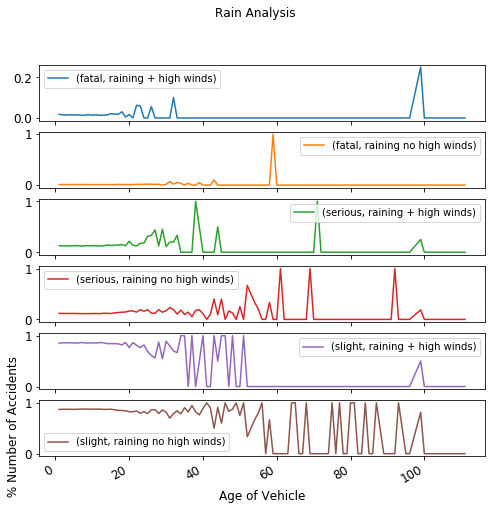

In [62]:
rain_analysis_all.plot(subplots=True, title='Rain Analysis', figsize=(8,8), fontsize=12)
plt.ylabel(' % Number of Accidents', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)

From the plot above you can see that:

(i) The most fatal accidents in 'raining + high winds' occur in around ~90 year old vehicles.

(ii) The most fatal accidents in 'raining no high winds' occur in around ~60 year old vehicles.

(iii) The most serious accidents in 'raining + high winds' occur in around ~30-45 and ~70 year old vehicles.

(iv) The most serious accidents in 'raining no high winds' occur in around ~40, ~70 and ~90 year old vehicles.

(v) The most slight accidents in 'raining + high winds' occurs in around in around ~0-50 years old vehicles before decreasing significantly.

(vi) The most slight accidents in 'raining no high winds' occur across all ages.

# 7. How did the introduction of modern technologies influence road safety?

Finally, we will look at how modern technologies influenced road safety and see if there was a decline or not in the number of road accidents in newer vehicles. In order to analyse this we will look at the numnber of accidents in each year and using the 'Accident_Severity' data see if the was a decline in the number of fatal/serious/slight accidents after the introduction of (e.g): airbags.

Again, for this question we are considering an old vehicle to be a vehicle which is 10 years and older.


### Groupby
Firstly, we will look at the number of accidents in each year. Here we will group the data by 'Year' column which is the year the accident happened. We will then count the number of accidents for each year by using the 'Accident_Index' column. Each row in the 'Accident_Index' represents an accident. Therefore, by counting the number of rows in this column for each year we will get the number of accidents for each year.

#### Q2A_1

In [63]:
Num_Accidents_Q2A_1 = Q2A_1.groupby('Year')[['Accident_Index']].count()
Num_Accidents_Q2A_1

,Accident_Index
Year,
1993,265385
1994,290820
1995,281366
1996,289899
1997,295800
1998,293484
1999,285920
2000,30631


#### Q2A_2

In [64]:
Num_Accidents_Q2A_2 = Q2A_2.groupby('Year')[['Accident_Index']].count()
Num_Accidents_Q2A_2

,Accident_Index
Year,
2000,257177
2001,277446
2002,240913
2003,215709
2004,251531


#### Q2A_3

In [65]:
Num_Accidents_Q2A_3 = Q2A_3.groupby('Year')[['Accident_Index']].count()
Num_Accidents_Q2A_3

,Accident_Index
Year,
2005,229743
2006,218496
2007,230718
2008,206587
2009,213216
2010,200825
2011,192934
2012,183604
2013,175107


### Aggregate Results

Below we will create a new dataframe containing the number of accidents which have occurred in each year for all of our 3 dataframes created above. 

We will do this by concatenating the 3 dataframes and grouping the data by 'Year' (year in which accident happened) and sum the values in each group to get the total number of accidents for each year.

We will also rename the 'Accident_Index' column to 'Accident_Count' as the column contains the number of accidents for each year.

In [66]:
all_num_accidents_groups = pd.concat([Num_Accidents_Q2A_1, Num_Accidents_Q2A_2, Num_Accidents_Q2A_3]).groupby(level=0).sum()
all_num_accidents_groups = all_num_accidents_groups.rename(columns={'Accident_Index': 'Accident_Count'})
all_num_accidents_groups

,Accident_Count
Year,
1993,265385
1994,290820
1995,281366
1996,289899
1997,295800
1998,293484
1999,285920
2000,287808
2001,277446


You can see in the follow graph that there is a decline in the number of accidents in recent years suggesting that perhaps new technologies have caused there to be less accidents overall.

Text(0.5,0,'Year')

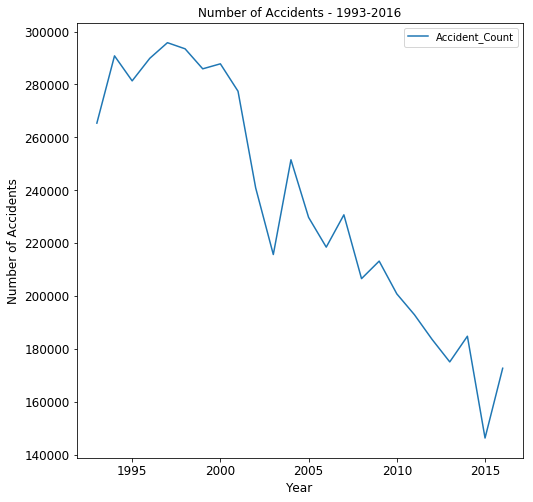

In [67]:
all_num_accidents_groups.plot(title='Number of Accidents - 1993-2016', figsize=(8,8), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)

Next, we will specifically look at some safety features of vehicles. Where possibly we will look at the year in which it became compulsory by law, othterwise we will look at the year in which it was introduced to the market.

For each feature we will look at the number of fatal/serious/slight accidents over the years and see if there was a decrease in the number of these after the year in which it was compulsory/introduced.

## 7.1 
## Airbags 
* Airbags became a compulsory feature in the EU in 2004.

Here we will specifically look at the years around when airbags were introduced and find if there were less fatal accidents.

### Groupby
Firstly, we will group the accidents by the 'Year' which is the year in which the accident happened. We will then get the value_counts for the 'Accident_Severity' in each of the groups to get the number of slight, serious and fatal accidents in each year. 

In [68]:
Accident_Severity_airbags1 = Q2A_1.groupby('Year')['Accident_Severity'].value_counts()
Accident_Severity_airbags2 = Q2A_2.groupby('Year')['Accident_Severity'].value_counts()
Accident_Severity_airbags3 = Q2A_3.groupby('Year')['Accident_Severity'].value_counts()

In [69]:
Accident_Severity_airbags1.head()

Year  Accident_Severity
1993  slight               219578
      serious               41604
      fatal                  4203
1994  slight               240869
      serious               45761
Name: Accident_Severity, dtype: int64

 Next we will unstack to get  the data in the format that we want.

In [70]:
Accident_Severity_airbags1 = Accident_Severity_airbags1.unstack()
Accident_Severity_airbags2 = Accident_Severity_airbags2.unstack()
Accident_Severity_airbags3 = Accident_Severity_airbags3.unstack()
Accident_Severity_airbags1.head()

Accident_Severity,fatal,serious,slight
Year,,,
1993,4203,41604,219578
1994,4190,45761,240869
1995,3973,43948,233445
1996,3904,42653,243342
1997,4050,41817,249933


### Aggregate Results

Below we will create a new dataframe containing the number of fatal, serious, slight accidents which have occurred in each year for all of our 3 dataframes created above. 

We will do this by concatenating the 3 dataframes and grouping the data by 'Accident_Severity' columns (fatal, serious, slight) and sum the values in each group for each row in the dataframe to get the total number of fatal, serious, slight accidents for each year.

In [71]:
All_Accident_Severity_airbags = pd.concat([Accident_Severity_airbags1, Accident_Severity_airbags2, Accident_Severity_airbags3], axis=1)
All_Accident_Severity_airbags.head()

Accident_Severity,fatal,serious,slight,fatal,serious,slight,fatal,serious,slight
Year,,,,,,,,,
1993,4203.0,41604.0,219578.0,NaN,NaN,NaN,NaN,NaN,NaN
1994,4190.0,45761.0,240869.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,3973.0,43948.0,233445.0,NaN,NaN,NaN,NaN,NaN,NaN
1996,3904.0,42653.0,243342.0,NaN,NaN,NaN,NaN,NaN,NaN
1997,4050.0,41817.0,249933.0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
All_Accident_Severity_airbags = All_Accident_Severity_airbags.groupby(All_Accident_Severity_airbags.columns, axis=1).sum()
All_Accident_Severity_airbags.head()

Accident_Severity,fatal,serious,slight
Year,,,
1993,4203.0,41604.0,219578.0
1994,4190.0,45761.0,240869.0
1995,3973.0,43948.0,233445.0
1996,3904.0,42653.0,243342.0
1997,4050.0,41817.0,249933.0


As airbags became compulsory in 2004 we will look at the years 2000-2008 and see if there was a decline in fatal accidents after 2004.

In [73]:
All_Accident_Severity_airbags.index

Int64Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name='Year')

In [74]:
sub_All_Accident_Severity_airbags = All_Accident_Severity_airbags[All_Accident_Severity_airbags.index >= 2000]
sub_All_Accident_Severity_airbags = sub_All_Accident_Severity_airbags[sub_All_Accident_Severity_airbags.index <= 2008]
sub_All_Accident_Severity_airbags

Accident_Severity,fatal,serious,slight
Year,,,
2000,3851.0,36909.0,247048.0
2001,3954.0,35359.0,238133.0
2002,3607.0,30726.0,206580.0
2003,3497.0,27015.0,185197.0
2004,3792.0,29877.0,217862.0
2005,3510.0,26384.0,199849.0
2006,3564.0,25853.0,189079.0
2007,3767.0,28227.0,198724.0
2008,3041.0,25355.0,178191.0


In the graph below we can see that there was a slight decline in the number of fatal accidents after airbags were introduced but not as much as we had expected.

Text(0.5,0,'Year')

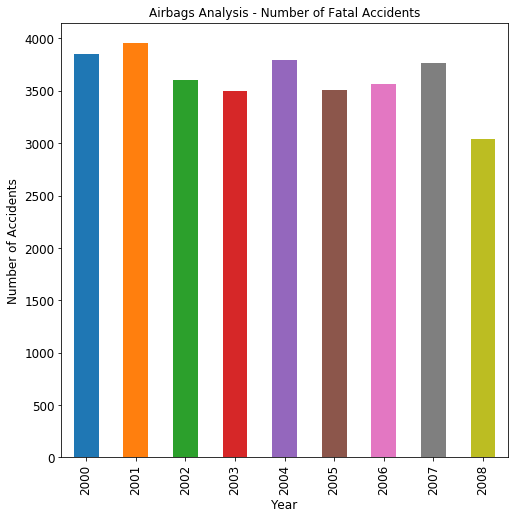

In [75]:
sub_All_Accident_Severity_airbags['fatal'].plot(kind='bar', title='Airbags Analysis - Number of Fatal Accidents', figsize=(8,8), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)

## 7.2 
## AEB brakes
* Autonomous Emergency Braking (AEB) started to become a feature in vehicles in 2010

Here we will specifically look at the years around when AEB brakes were introduced and find if there were less serious accidents.

### Groupby
Firstly, we will group the accidents by the 'Year' which is the year in which the accident happened. We will then get the value_counts for the 'Accident_Severity' in each of the groups to get the number of slight, serious and fatal accidents in each year.

In [76]:
Accident_Severity_AEB1 = Q2A_1.groupby('Year')['Accident_Severity'].value_counts()
Accident_Severity_AEB2 = Q2A_2.groupby('Year')['Accident_Severity'].value_counts()
Accident_Severity_AEB3 = Q2A_3.groupby('Year')['Accident_Severity'].value_counts()
Accident_Severity_AEB1.head()

Year  Accident_Severity
1993  slight               219578
      serious               41604
      fatal                  4203
1994  slight               240869
      serious               45761
Name: Accident_Severity, dtype: int64

 Next we will unstack to get  the data in the format that we want.

In [77]:
Accident_Severity_AEB1 = Accident_Severity_AEB1.unstack() 
Accident_Severity_AEB2 = Accident_Severity_AEB2.unstack() 
Accident_Severity_AEB3 = Accident_Severity_AEB3.unstack() 
Accident_Severity_AEB1.head()

Accident_Severity,fatal,serious,slight
Year,,,
1993,4203,41604,219578
1994,4190,45761,240869
1995,3973,43948,233445
1996,3904,42653,243342
1997,4050,41817,249933


### Aggregate Results

Below we will create a new dataframe containing the number of fatal, serious, slight accidents which have occurred in each year for all of our 3 dataframes created above. 

We will do this by concatenating the 3 dataframes and grouping the data by 'Accident_Severity' columns (fatal, serious, slight) and sum the values in each group for each row in the dataframe to get the total number of fatal, serious, slight accidents for each year.

In [78]:
All_Accident_Severity_AEB = pd.concat([Accident_Severity_AEB1, Accident_Severity_AEB2, Accident_Severity_AEB3], axis=1)
All_Accident_Severity_AEB = All_Accident_Severity_AEB.groupby(All_Accident_Severity_AEB.columns, axis=1).sum()

All_Accident_Severity_AEB.head()

Accident_Severity,fatal,serious,slight
Year,,,
1993,4203.0,41604.0,219578.0
1994,4190.0,45761.0,240869.0
1995,3973.0,43948.0,233445.0
1996,3904.0,42653.0,243342.0
1997,4050.0,41817.0,249933.0


As AEB brakes first started to be introduced in vehicles in 2010  we will look at the years 2006-2014 and see if there was a decline in serious accidents after 2010.

In [79]:
All_Accident_Severity_AEB.index

Int64Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name='Year')

In [80]:
sub_All_Accident_Severity_AEB = All_Accident_Severity_AEB[All_Accident_Severity_AEB.index >= 2006]
sub_All_Accident_Severity_AEB = sub_All_Accident_Severity_AEB[sub_All_Accident_Severity_AEB.index <= 2014]
sub_All_Accident_Severity_AEB

Accident_Severity,fatal,serious,slight
Year,,,
2006,3564.0,25853.0,189079.0
2007,3767.0,28227.0,198724.0
2008,3041.0,25355.0,178191.0
2009,2778.0,26088.0,184350.0
2010,2446.0,24077.0,174302.0
2011,2452.0,24204.0,166278.0
2012,2179.0,23793.0,157632.0
2013,2163.0,22394.0,150550.0
2014,2199.0,23736.0,158879.0


In the graph below you can see that there is hardly any difference in the number of serious accidents after 2010.

Text(0.5,0,'Year')

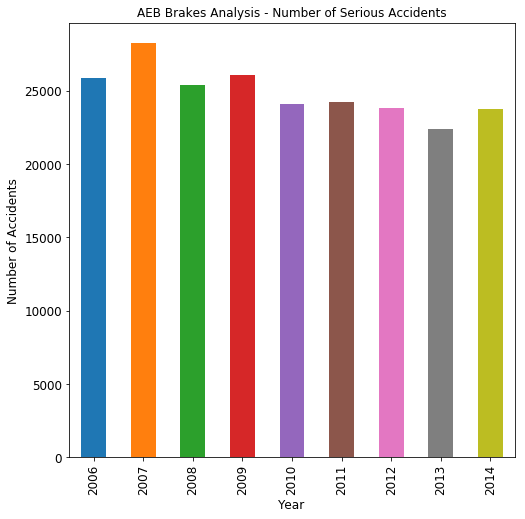

In [81]:
sub_All_Accident_Severity_AEB['serious'].plot(kind='bar', title='AEB Brakes Analysis - Number of Serious Accidents', figsize=(8,8), fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)

# 8. Saving Data to a Pickle File
Here we will save the dataframes needed for our results into a pickle file.

In [82]:
pickle_save_time = %timeit -o All_Num_Accidents.to_pickle("../../data/analysis/400_Analysis_Q2A_All_Num_Accidents.pkl")

pickle_save_time

5.79 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.79 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [83]:
pickle_save_time = %timeit -o All_less_than_or_equal_2004.to_pickle("../../data/analysis/400_Analysis_Q2A_All_less_than_or_equal_2004.pkl")

pickle_save_time

6.02 ms ± 438 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.02 ms ± 438 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [84]:
pickle_save_time = %timeit -o All_greater_than_or_equal_2005.to_pickle("../../data/analysis/400_Analysis_Q2A_All_greater_than_or_equal_2005.pkl")

pickle_save_time

5.97 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.97 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [85]:
pickle_save_time = %timeit -o All_Number_of_Casualties.to_pickle("../../data/analysis/400_Analysis_Q2A_All_number_of_Casualties.pkl")

pickle_save_time

5.38 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.38 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [86]:
pickle_save_time = %timeit -o norm_All_Accident_Severity_groups.to_pickle("../../data/analysis/400_Analysis_Q2A_norm_All_Accident_Severity_groups.pkl")

pickle_save_time

5.42 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.42 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [87]:
pickle_save_time = %timeit -o norm_All_weather_conditions_groups.to_pickle("../../data/analysis/400_Analysis_Q2A_norm_All_weather_conditions_groups.pkl")

pickle_save_time

7.2 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 7.2 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [88]:
pickle_save_time = %timeit -o max_fatal.to_pickle("../../data/analysis/400_Analysis_Q2A_max_fatal.pkl")

pickle_save_time

5.7 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.7 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [89]:
pickle_save_time = %timeit -o max_serious.to_pickle("../../data/analysis/400_Analysis_Q2A_max_serious.pkl")

pickle_save_time

5.52 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.52 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [90]:
pickle_save_time = %timeit -o max_slight.to_pickle("../../data/analysis/400_Analysis_Q2A_max_slight.pkl")

pickle_save_time

7.1 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 7.1 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [91]:
pickle_save_time = %timeit -o rain_analysis_all.to_pickle("../../data/analysis/400_Analysis_Q2A_rain_analysis_all.pkl")

pickle_save_time

6.31 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.31 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [92]:
pickle_save_time = %timeit -o all_num_accidents_groups.to_pickle("../../data/analysis/400_Analysis_Q2A_all_num_accidents_groups.pkl")

pickle_save_time

5.34 ms ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.34 ms ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [93]:
pickle_save_time = %timeit -o All_Accident_Severity_airbags.to_pickle("../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_airbags.pkl")

pickle_save_time

6.7 ms ± 611 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.7 ms ± 611 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [94]:
pickle_save_time = %timeit -o sub_All_Accident_Severity_airbags.to_pickle("../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_airbags.pkl")

pickle_save_time

5.9 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.9 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [95]:
pickle_save_time = %timeit -o All_Accident_Severity_AEB.to_pickle("../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_AEB.pkl")

pickle_save_time

6.45 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.45 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [96]:
pickle_save_time = %timeit -o sub_All_Accident_Severity_AEB.to_pickle("../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_AEB.pkl")

pickle_save_time

5.85 ms ± 76.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.85 ms ± 76.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

# 9. Creating Data Dictionaries
Finally, we will create a data dictionary for each pickle file.

In [97]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_Num_Accidents.pkl', 

"""\
Aggregate raw data for number of accidents for ages of vehicles.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,100.0,56311.51,137381.636172,1.0,6.0,61.5,1475.0,500406.0,0,0.0


In [98]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_less_than_or_equal_2004.pkl', 

"""\
Aggregate raw data for number of accidents for ages of vehicles between 1993-2004.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,86.0,38093.965116,85893.320134,1.0,3.0,43.0,1694.5,304742.0,0,0.0


In [99]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_greater_than_or_equal_2005.pkl', 

"""\
Aggregate raw data for number of accidents for ages of vehicles between 2005-2016.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,97.0,24279.072165,57465.175656,1.0,5.0,50.0,1287.0,195664.0,0,0.0


In [100]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_number_of_Casualties.pkl', 

"""\
Aggregate raw data for average number of casualties for all vehicle ages.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Number_of_Casualties,100.0,1.196837,0.444531,0.333333,0.983796,1.333333,1.476978,2.241667,0,0.0


In [101]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_norm_All_Accident_Severity_groups.pkl', 

"""\
Aggregate raw data for number of fatal, serious and slight accidents for all vehicle ages.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,100.0,0.022617,0.047171,0.0,0.000000,0.013275,0.019914,0.25,0,0.0
serious,100.0,0.261520,0.223202,0.0,0.134827,0.218148,0.315095,1.00,0,0.0
slight,100.0,0.715864,0.226522,0.0,0.666667,0.759411,0.849889,1.00,0,0.0


In [102]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_norm_All_weather_conditions_groups.pkl', 

"""\
Aggregate raw data for normalised number of accidents in the different recorded weather conditions for all vehicle ages.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,431.0,0.018429,0.061386,0.0,0.000000,0.007792,0.016518,1.0,0,0.0
serious,431.0,0.190026,0.218051,0.0,0.100702,0.141780,0.208976,1.0,0,0.0
slight,431.0,0.791545,0.225189,0.0,0.753956,0.843212,0.889130,1.0,0,0.0


In [103]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_max_fatal.pkl', 

"""\
Aggregate raw data for the age of vehicle in the weather condition with most fatal accidents.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0,0.0
serious,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0
slight,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0


In [104]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_max_serious.pkl', 

"""\
Aggregate raw data for for the age of vehicle in the weather condition with most serious accidents.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
serious,20.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0
slight,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [105]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_max_slight.pkl', 

"""\
Aggregate raw data for for the age of vehicle in the weather condition with most slight accidents.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
serious,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
slight,95.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0


In [106]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_rain_analysis_all.pkl', 

"""\
Aggregate raw data for all the data related to rainy weather conditions .
""").head()

count      mean       std  min  25%       50%  \
fatal   raining + high winds   100.0  0.008444  0.028655  0.0  0.0  0.000000   
        raining no high winds  100.0  0.017053  0.100401  0.0  0.0  0.000000   
serious raining + high winds   100.0  0.090805  0.175112  0.0  0.0  0.000000   
        raining no high winds  100.0  0.122815  0.194371  0.0  0.0  0.111933   
slight  raining + high winds   100.0  0.370751  0.422578  0.0  0.0  0.000000   

                                    75%   max  Missing  %Missing  
fatal   raining + high winds   0.001190  0.25        0       0.0  
        raining no high winds  0.010311  1.00        0       0.0  
serious raining + high winds   0.129199  1.00        0       0.0  
        raining no high winds  0.148130  1.00        0       0.0  
slight  raining + high winds   0.852912  1.00        0       0.0

In [107]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_all_num_accidents_groups.pkl', 

"""\
Aggregate raw data for the number of accidents in each year.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,24.0,234631.291667,46255.348669,146321.0,198852.25,230230.5,282504.5,295800.0,0,0.0


In [108]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_airbags.pkl', 

"""\
Aggregate raw data for airbags severity analysis.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,24.0,3289.125000,777.077933,1826.0,2450.50,3585.5,3886.75,4203.0,0,0.0
serious,24.0,31111.625000,8098.814147,18441.0,25067.25,27621.0,37993.25,45761.0,0,0.0
slight,24.0,200230.541667,38081.669384,126054.0,172296.00,199286.5,238817.00,250132.0,0,0.0


In [109]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_airbags.pkl', 

"""\
Aggregate raw data for airbags severity analysis - years surrounding when airbags became compulsory.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,9.0,3620.333333,269.695198,3041.0,3510.0,3607.0,3792.0,3954.0,0,0.0
serious,9.0,29522.777778,4166.061413,25355.0,26384.0,28227.0,30726.0,36909.0,0,0.0
slight,9.0,206740.333333,23549.891465,178191.0,189079.0,199849.0,217862.0,247048.0,0,0.0


In [110]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_AEB.pkl', 

"""\
Aggregate raw data for AEB brakes analysis.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,24.0,3289.125000,777.077933,1826.0,2450.50,3585.5,3886.75,4203.0,0,0.0
serious,24.0,31111.625000,8098.814147,18441.0,25067.25,27621.0,37993.25,45761.0,0,0.0
slight,24.0,200230.541667,38081.669384,126054.0,172296.00,199286.5,238817.00,250132.0,0,0.0


In [111]:
data_dictionary.save(
    '../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_AEB.pkl', 

"""\
Aggregate raw data for AEB brakes severity analysis - years around when they were introduced.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,9.0,2732.111111,605.691845,2163.0,2199.0,2452.0,3041.0,3767.0,0,0.0
serious,9.0,24858.555556,1717.635519,22394.0,23793.0,24204.0,25853.0,28227.0,0,0.0
slight,9.0,173109.444444,16056.076140,150550.0,158879.0,174302.0,184350.0,198724.0,0,0.0
